<a href="https://colab.research.google.com/github/pndang/Everything-PyTorch/blob/master/FNN_Regresison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Make dataset

N = 1000
X = np.random.random((N, 2)) * 6 - 3  # uniformly distributed between (-3, +3)
y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

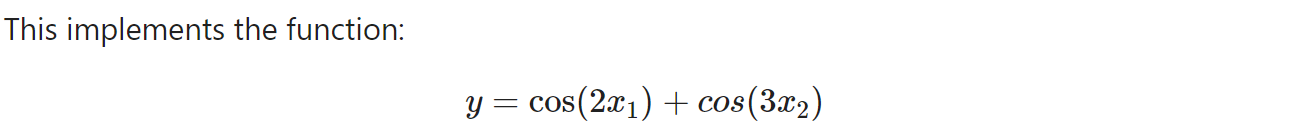

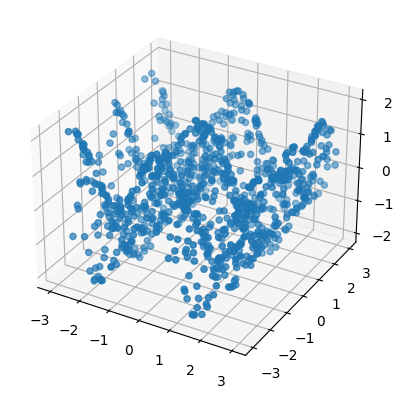

In [18]:
# Plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

In [26]:
# Build model

model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [27]:
# Loss and optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
# Train model

def full_gradient_descent(model, criterion, optimizer, X_train, y_train, epochs=1000):
  # Stuff to store
  train_losses = np.zeros(epochs)

  for ite in range(epochs):
    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    loss.backward()
    optimizer.step()

    # Store losses
    train_losses[ite] = loss.item()

    if (ite + 1) % 50 == 0:
      print(f"Epoch {ite+1}/{epochs}, Train Loss: {loss.item():.4f}")

  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))
train_losses = full_gradient_descent(model, criterion, optimizer, X_train, y_train)

Epoch 50/1000, Train Loss: 0.8097
Epoch 100/1000, Train Loss: 0.3188
Epoch 150/1000, Train Loss: 0.1292
Epoch 200/1000, Train Loss: 0.0353
Epoch 250/1000, Train Loss: 0.0134
Epoch 300/1000, Train Loss: 0.0083
Epoch 350/1000, Train Loss: 0.0061
Epoch 400/1000, Train Loss: 0.0050
Epoch 450/1000, Train Loss: 0.0046
Epoch 500/1000, Train Loss: 0.0038
Epoch 550/1000, Train Loss: 0.0035
Epoch 600/1000, Train Loss: 0.0052
Epoch 650/1000, Train Loss: 0.0031
Epoch 700/1000, Train Loss: 0.0029
Epoch 750/1000, Train Loss: 0.0051
Epoch 800/1000, Train Loss: 0.0027
Epoch 850/1000, Train Loss: 0.0026
Epoch 900/1000, Train Loss: 0.0025
Epoch 950/1000, Train Loss: 0.0027
Epoch 1000/1000, Train Loss: 0.0024


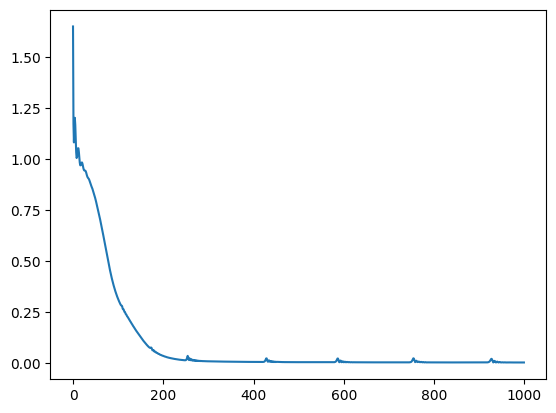

In [29]:
plt.plot(train_losses)

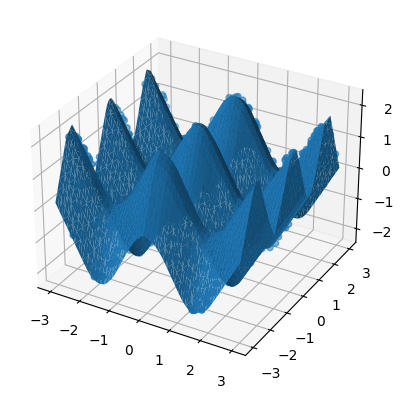

In [48]:
# Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# Add surface plot
with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

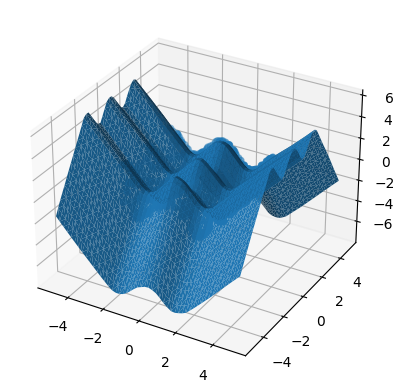

In [50]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
  plt.show()

Not really